In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Wine\Wine_C_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,NaN,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,NaN
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	3
float64		column 2	0
float64		column 3	1
float64		column 4	0
float64		column 5	2
float64		column 6	0
float64		column 7	1
float64		column 8	3
float64		column 9	3
float64		column 10	4
float64		column 11	0
float64		column 12	2
float64		column 13	4


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,175.000000,178.000000,177.000000,178.000000,176.000000,178.000000,177.000000,175.000000,175.000000,174.000000,178.000000,176.000000,174.000000
mean,13.000343,2.336348,2.364068,19.494944,99.886364,2.295112,2.030282,0.362514,1.588171,5.078621,0.957449,2.607727,745.948276
std,0.817941,1.117146,0.273164,3.339564,14.297997,0.625851,1.001601,0.125022,0.576149,2.324092,0.228572,0.712896,315.264789
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.350000,1.602500,2.210000,17.200000,88.000000,1.742500,1.200000,0.270000,1.245000,3.250000,0.782500,1.927500,500.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.140000,0.340000,1.550000,4.750000,0.965000,2.780000,673.500000
75%,13.685000,3.082500,2.550000,21.500000,107.250000,2.800000,2.880000,0.445000,1.955000,6.200000,1.120000,3.172500,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<AxesSubplot:>

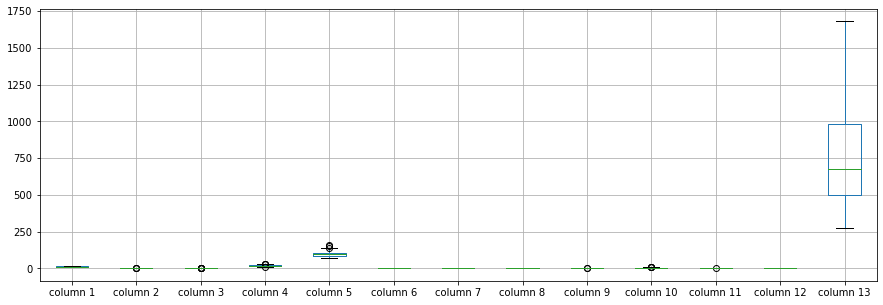

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      13.000343
column 2       2.336348
column 3       2.364068
column 4      19.494944
column 5      99.886364
column 6       2.295112
column 7       2.030282
column 8       0.362514
column 9       1.588171
column 10      5.078621
column 11      0.957449
column 12      2.607727
column 13    745.948276
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,0.090476,0.203655,-0.314877,0.264160,0.292484,0.243396,-0.167564,0.138920,0.543317,-0.067883,0.072304,0.640856
column 2,0.090476,1.000000,0.168826,0.288500,-0.060344,-0.335167,-0.413985,0.290210,-0.220199,0.248745,-0.561296,-0.366817,-0.186189
column 3,0.203655,0.168826,1.000000,0.446804,0.287682,0.120819,0.106863,0.178131,0.010854,0.271155,-0.087181,-0.005502,0.218413
column 4,-0.314877,0.288500,0.446804,1.000000,-0.076502,-0.321113,-0.354834,0.371207,-0.197008,0.022318,-0.273955,-0.274172,-0.445054
column 5,0.264160,-0.060344,0.287682,-0.076502,1.000000,0.211950,0.204090,-0.265583,0.240547,0.214040,0.069639,0.071646,0.382172
column 6,0.292484,-0.335167,0.120819,-0.321113,0.211950,1.000000,0.864979,-0.457840,0.612936,-0.056165,0.433681,0.701633,0.493374
column 7,0.243396,-0.413985,0.106863,-0.354834,0.204090,0.864979,1.000000,-0.557333,0.662423,-0.175316,0.544297,0.792863,0.491139
column 8,-0.167564,0.290210,0.178131,0.371207,-0.265583,-0.457840,-0.557333,1.000000,-0.384810,0.116481,-0.265890,-0.507344,-0.312718
column 9,0.138920,-0.220199,0.010854,-0.197008,0.240547,0.612936,0.662423,-0.384810,1.000000,-0.015516,0.295322,0.515930,0.326530
column 10,0.543317,0.248745,0.271155,0.022318,0.214040,-0.056165,-0.175316,0.116481,-0.015516,1.000000,-0.527638,-0.444467,0.308610


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+21,13+21+21,13+21+21,13+21+21+21+21,13+21+21+21+21+21,13+21+21+21+21+21+21,13+21+21+21+21+21,13+21+21+21+21,13+21+21+21,13+21+21,13+21,13], vae_layer = False, seed = 210)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 942.0384244051846
Epoch: 1 , loss: 939.9819169477983
Epoch: 2 , loss: 940.1292447176846
Epoch: 3 , loss: 943.3852483575994
Epoch: 4 , loss: 937.6641679243608
Epoch: 5 , loss: 945.9179742986506
Epoch: 6 , loss: 935.9696266867898
Epoch: 7 , loss: 935.3873291015625
Epoch: 8 , loss: 943.4690496271306
Epoch: 9 , loss: 937.3653176047585
Epoch: 10 , loss: 938.0380359996449
Epoch: 11 , loss: 944.3577159534801
Epoch: 12 , loss: 939.9795809659091
Epoch: 13 , loss: 944.7747636274858
Epoch: 14 , loss: 942.2765059037642
Epoch: 15 , loss: 943.7560091885654
Epoch: 16 , loss: 944.8519287109375
Epoch: 17 , loss: 931.4388205788352
Epoch: 18 , loss: 942.051835493608
Epoch: 19 , loss: 937.5866199840199
Epoch: 20 , loss: 942.7077470259233
Epoch: 21 , loss: 938.278359153054
Epoch: 22 , loss: 936.5459872159091
Epoch: 23 , loss: 936.7628451260654
Epoch: 24 , loss: 939.0898770419034
Epoch: 25 , loss: 943.4122924804688
Epoch: 2

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(178, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      12.93
column 2       3.80
column 3       2.65
column 4      18.60
column 5     102.00
column 6       2.41
column 7       2.41
column 8       0.25
column 9       1.98
column 10      4.50
column 11      1.03
column 12      3.52
column 13    770.00
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Wine.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
174,-4.663938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-741.10054
175,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
176,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(1677.7205143693234, 10898.078031484092)

In [17]:
NRMS=numerator/denominator
NRMS


0.15394645822157438

In [18]:
new_df.iloc[66,:]

column 1      13.11
column 2       1.01
column 3       1.70
column 4      15.00
column 5      78.00
column 6       2.98
column 7       3.18
column 8       0.26
column 9       2.28
column 10      5.30
column 11      1.12
column 12      3.18
column 13    502.00
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.230000,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.00000
1,13.200000,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.00000
2,13.160000,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.00000
3,14.370000,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.00000
4,13.240000,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.710000,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.00000
174,8.736062,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,8.89946
175,13.270000,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.00000
176,13.170000,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.00000


In [20]:
imputations[-1].to_excel("Wine_C_1(imp).xlsx", index=False, header=False)